sigma^2 = lambda * sigma(prev)^2 + (1-lambda)return^2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import data_reader as dr

In [2]:
data, source = dr.read('kospi.csv')
data.info()

Loading data from file /home/changhyun/workspace/cxk858/dataset/kospi.csv...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2471 entries, 1 to 2483
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2471 non-null   object 
 1   Open                 2471 non-null   float64
 2   High                 2471 non-null   float64
 3   Low                  2471 non-null   float64
 4   Close                2471 non-null   float64
 5   Adj Close            2471 non-null   float64
 6   Volume               2471 non-null   float64
 7   Daily_trading_range  2471 non-null   float64
 8   Log_Volume_change    2471 non-null   float64
 9   Daily_return         2471 non-null   float64
 10  Daily_log_return     2471 non-null   float64
 11  Past_vol22           2450 non-null   float64
 12  Past_vol10           2462 non-null   float64
 13  Target22             2450 non-null   float64
dtypes: float64

In [3]:
data = data.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily_return'], axis=1)
data['Squared_return'] = data['Daily_log_return']**2
data.head(30)

,Date,Daily_trading_range,Log_Volume_change,Daily_log_return,Past_vol22,Past_vol10,Target22,Squared_return
1,2010-12-02,10.030030,25.790951,0.010795,NaN,NaN,NaN,1.165346e-04
2,2010-12-03,12.099975,-0.091158,0.003583,NaN,NaN,NaN,1.283674e-05
3,2010-12-06,15.119995,4.829061,-0.001851,NaN,NaN,NaN,3.427068e-06
4,2010-12-07,12.079956,32.833894,0.004535,NaN,NaN,NaN,2.056681e-05
5,2010-12-08,16.940063,-25.283534,-0.003471,NaN,NaN,NaN,1.204766e-05
6,2010-12-09,27.279907,-10.191940,0.016853,NaN,NaN,NaN,2.840395e-04
7,2010-12-10,12.229981,-18.147427,-0.001419,NaN,NaN,NaN,2.013009e-06
8,2010-12-13,13.429931,3.081218,0.005248,NaN,NaN,NaN,2.753777e-05
9,2010-12-14,12.230103,2.812765,0.006221,NaN,NaN,NaN,3.870444e-05
10,2010-12-15,13.419921,21.208923,0.004187,NaN,0.096936,NaN,1.753264e-05


In [4]:
data_cleaned = data[21:]
data_cleaned.head()

,Date,Daily_trading_range,Log_Volume_change,Daily_log_return,Past_vol22,Past_vol10,Target22,Squared_return
22,2011-01-03,15.260010,14.632111,0.009260,0.088908,0.077581,0.103003,0.000086
23,2011-01-04,16.019776,16.086549,0.007249,0.086037,0.075668,0.099205,0.000053
24,2011-01-05,10.219971,-7.434844,-0.001243,0.087213,0.072652,0.098520,0.000002
25,2011-01-06,30.549804,5.468045,-0.002375,0.087567,0.075905,0.098654,0.000006
26,2011-01-07,17.540039,-19.485688,0.004126,0.087481,0.075547,0.098439,0.000017


In [5]:
sqreturn = np.array(data_cleaned['Daily_log_return']**2)
target = np.array(data_cleaned[['Target22']])
target = pd.DataFrame(target)


In [6]:
trainSize = int(len(sqreturn)*0.8)
testSize = len(sqreturn) - trainSize
# Training session

trainX = sqreturn[:trainSize]
trainY = target[:trainSize]

testX = sqreturn[trainSize:]
testY = target[trainSize:]


In [7]:
pred_vol = []
lamb=0.94
pred_vol.append(data_cleaned['Past_vol22'].iloc[0] / np.sqrt(252))

for i in range(trainSize-1):
    pred = lamb*(pred_vol[-1]**2) + (1-lamb)*sqreturn[i]
    pred_vol.append(np.sqrt(pred))

prev_vol = pred_vol[-1]
pred_vol = pd.DataFrame(pred_vol)
pred_vol = pred_vol * np.sqrt(252)
pred_vol

,0
0,0.088908
1,0.093417
2,0.094856
3,0.092093
4,0.089764
...,...
1955,0.143457
1956,0.148290
1957,0.143775
1958,0.141459


In [8]:
trainY

,0
0,0.103003
1,0.099205
2,0.098520
3,0.098654
4,0.098439
...,...
1955,0.147425
1956,0.141096
1957,0.140108
1958,0.149126


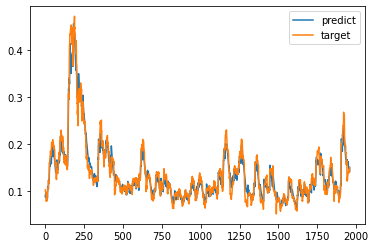

In [9]:
plt.plot(pred_vol.iloc[:], label='predict')
plt.plot(trainY.iloc[:], label='target')
plt.legend()
plt.show()

In [10]:
import metrics as mt

In [11]:
mt.testScore(pred_vol.iloc[1:], trainY.iloc[1:])

test Score: 0.00023992084792087096 MSE
test Score: 0.015489378551797066 RMSE
test Score: 0.08241582342209766 MAPE
test Score: 0.9450699569001114 R2 score


In [15]:
# test
lamb=0.93
test_pred = []
test_pred.append(prev_vol)
for i in range(trainSize, len(sqreturn)):
    test_vol = lamb*(test_pred[-1]**2) + (1-lamb)*sqreturn[i]
    test_pred.append(np.sqrt(test_vol))

test_pred = pd.DataFrame(test_pred)
test_pred = np.sqrt(252)*test_pred
test_target = np.array(target.iloc[len(sqreturn)-testSize:])
test_target = pd.DataFrame(test_target)

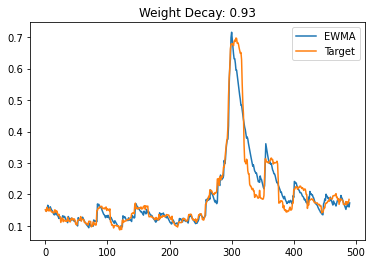

In [18]:
plt.plot(test_pred[1:], label='EWMA')
plt.plot(test_target, label='Target')
plt.title('Weight Decay: 0.93')
plt.legend()
plt.savefig('images/EWMA.png')
plt.show()

In [19]:
mt.testScore(test_pred[1:], test_target)

test Score: 0.001064175404568997 MSE
test Score: 0.03262170143583864 RMSE
test Score: 0.08772359431234633 MAPE
test Score: 0.9251169337562307 R2 score
